In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.3508 - val_loss: 0.2692
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2601 - val_loss: 0.2481
Epoch 3/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2384 - val_loss: 0.2267
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.2192 - val_loss: 0.2098
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2050 - val_loss: 0.1977
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1943 - val_loss: 0.1881
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1856 - val_loss: 0.1804
Epoch 8/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1786 - val_loss: 0.1741
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1728 - val_loss: 0.1687
Epoc

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

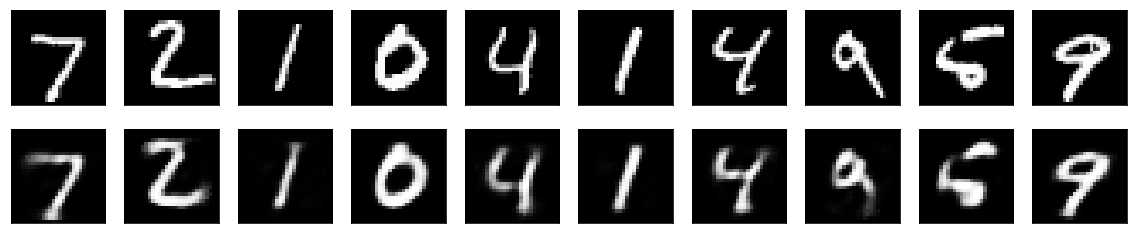

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

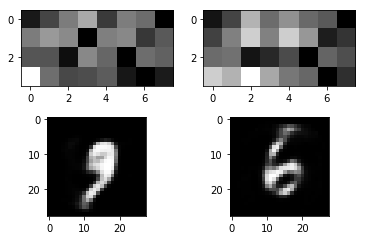

In [76]:
e1 = encoded_imgs[1000,].reshape(4,8)
e2 = encoded_imgs[2000,].reshape(4,8)
d1 = decoded_imgs[1000,].reshape(28,28)
d2 = decoded_imgs[2000,].reshape(28,28)
plt.subplot(2,2,1)
plt.imshow(e1)
plt.subplot(2,2,2)
plt.imshow(e2)
plt.subplot(2,2,3)
plt.imshow(d1)
plt.subplot(2,2,4)
plt.imshow(d2)

diff = e1 - e2
step = diff/10

e3 = e2

## now run the block below a few times and see what happens to the '6' 

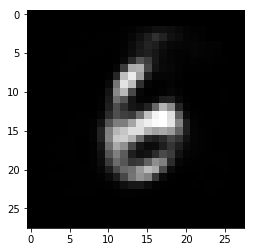

In [78]:
e3 = e3 + step
e3rs = e3.reshape(32,)
plt.imshow(decoder.predict(np.expand_dims(e3rs, axis=0)).reshape(28,28))

In [79]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
t = np.arange(0,1,0.005)

def pltsin(f):
    e3 = e1*f + e2*(f-1)
    e3rs = e3.reshape(32,)
    e3rs = np.expand_dims(e3rs, axis=0)
    morph = decoder.predict(e3rs)
    plt.imshow(morph.reshape(28,28))
    plt.show
    
x = interact(pltsin, f=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='f', max=1.0), Output()), _dom_classes=('widget-interact',))